In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


## Generate a Synthetic Time-Series Dataset

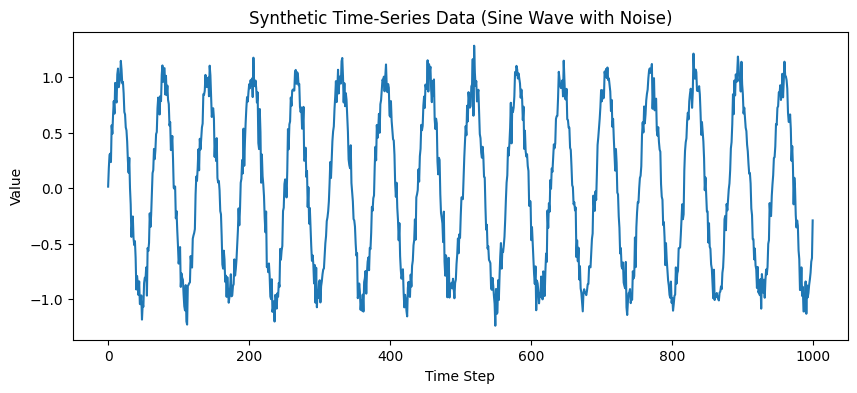

In [ ]:
# Parameters for the synthetic dataset
n_samples = 1000  # Total samples in the sequence
time_steps = 50   # Number of time steps the RNN will look back

# Generate sine wave with added noise
X = np.linspace(0, 100, n_samples)
y = np.sin(X) + 0.1 * np.random.normal(size=n_samples)

# Plot the generated data
plt.figure(figsize=(10, 4))
plt.plot(y)
plt.title("Synthetic Time-Series Data (Sine Wave with Noise)")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()

## Prepare the Data for RNN

In [7]:
# Prepare the dataset in a supervised learning format
data = []
target = []

for i in range(len(y) - time_steps):
    data.append(y[i:i + time_steps])
    target.append(y[i + time_steps])

X_rnn = np.array(data).reshape(-1, time_steps, 1)  # Reshape to [samples, time_steps, features]
y_rnn = np.array(target)

# Scale data to range [0, 1] for better model performance
scaler = MinMaxScaler()
X_rnn = scaler.fit_transform(X_rnn.reshape(-1, X_rnn.shape[-1])).reshape(X_rnn.shape)
y_rnn = scaler.fit_transform(y_rnn.reshape(-1, 1)).reshape(-1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rnn, y_rnn, test_size=0.2, random_state=42)


## Build the RNN Model

In [8]:
# Define the RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(time_steps, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()


c:\Users\Rahim\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [9]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.5878 - val_loss: 0.0211
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0137 - val_loss: 0.0060
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0047 - val_loss: 0.0041
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0

## Evaluate the model


In [10]:
# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {mse}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0021 
Mean Squared Error on Test Set: 0.00195493851788342


## Make Predictions and Visualize Results

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


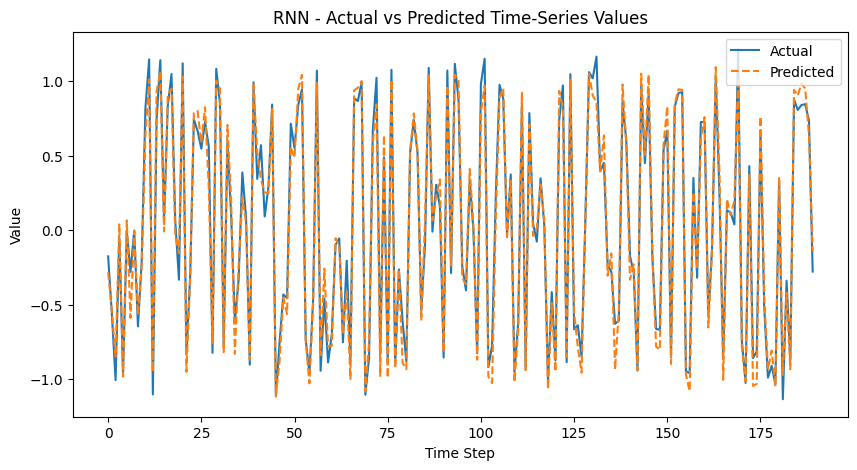

In [11]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse scale the predictions for plotting
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, label="Actual")
plt.plot(y_pred_inv, label="Predicted", linestyle="--")
plt.legend()
plt.title("RNN - Actual vs Predicted Time-Series Values")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.show()